In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bmw_pricing_challenge.csv')
df.shape

(4843, 18)

In [3]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [4]:
df.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [6]:
### missing values handling 
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [7]:
### Encoding - label encoding and OHE
categorical_f = df.select_dtypes('object').columns
df[categorical_f].head()

,maker_key,model_key,registration_date,fuel,paint_color,car_type,sold_at
0,BMW,118,2012-02-01,diesel,black,convertible,2018-01-01
1,BMW,M4,2016-04-01,petrol,grey,convertible,2018-02-01
2,BMW,320,2012-04-01,diesel,white,convertible,2018-02-01
3,BMW,420,2014-07-01,diesel,red,convertible,2018-02-01
4,BMW,425,2014-12-01,diesel,silver,convertible,2018-04-01


In [8]:
for each in ['maker_key', 'model_key', 'fuel', 'paint_color',
       'car_type']:
     print(each, "=>",df[each].unique(), df[each].nunique())

maker_key => ['BMW'] 1
model_key => ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] 75
fuel => ['diesel' 'petrol' 'hybrid_petrol' 'electro'] 4
paint_color => ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] 10
car_type => ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 '

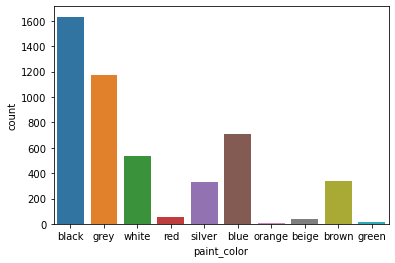

In [9]:
# working with paint colour

sns.countplot(df.paint_color)

In [10]:
df.groupby('paint_color')['mileage','price'].mean().reset_index().sort_values('mileage')
## try to find out if any relationship between color of the car and mileage in real world?

,paint_color,mileage,price
6,orange,88756.333333,18866.666667
7,red,125155.615385,16500.000000
0,beige,128870.707317,15817.073171
9,white,129582.401487,17328.438662
3,brown,135704.771261,15367.741935
2,blue,138387.687324,15114.929577
5,grey,143757.417872,15595.744681
1,black,144289.800367,16173.851806
8,silver,146053.112462,14816.109422
4,green,195606.000000,7200.000000


In [11]:
for each in df.paint_color.unique():
    print(each, df[df.paint_color==each].describe())

# note: orange color  has hghes minimum price but frequency is least. Try to look for relationship between car color and per unit car price  

black             mileage  engine_power         price
count  1.633000e+03   1633.000000   1633.000000
mean   1.442898e+05    131.008573  16173.851806
std    6.310074e+04     38.979223   8874.971468
min   -6.400000e+01     25.000000    100.000000
25%    1.064040e+05    105.000000  10900.000000
50%    1.454710e+05    120.000000  14500.000000
75%    1.776710e+05    140.000000  19300.000000
max    1.000376e+06    317.000000  75000.000000
grey              mileage  engine_power          price
count    1175.000000   1175.000000    1175.000000
mean   143757.417872    129.268936   15595.744681
std     60480.526550     38.198944    9622.369714
min      5578.000000     70.000000     100.000000
25%    104144.500000    100.000000   10800.000000
50%    140631.000000    120.000000   14000.000000
75%    179102.500000    135.000000   17900.000000
max    477571.000000    317.000000  142800.000000
white              mileage  engine_power         price
count     538.000000    538.000000    538.000000
mea

In [12]:
## converting boolean features into binary  
boolean_f = df.select_dtypes('boolean').columns
df[boolean_f].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,True,True,False,False,True,True,True,False
1,True,True,False,False,False,True,True,True
2,False,False,False,False,True,False,True,False
3,True,True,False,False,True,True,True,True
4,True,True,False,False,False,True,True,True


In [13]:
for each in boolean_f:
     print(each, df[each].unique())

feature_1 [ True False]
feature_2 [ True False]
feature_3 [False  True]
feature_4 [False  True]
feature_5 [ True False]
feature_6 [ True False]
feature_7 [ True False]
feature_8 [False  True]


In [14]:
for col in boolean_f:
    df[col] = df[col].apply(lambda x: 1 if x== True else 0)

In [15]:
df[boolean_f].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,1,1,0,0,1,1,1,0
1,1,1,0,0,0,1,1,1
2,0,0,0,0,1,0,1,0
3,1,1,0,0,1,1,1,1
4,1,1,0,0,0,1,1,1


In [16]:
## converting time columns as time type
df.registration_date = pd.to_datetime(df.registration_date)
df.sold_at = pd.to_datetime(df.sold_at)

In [17]:
###  Exacting time components from time columns
df['reg_year'] = df.registration_date.dt.year
df['reg_month'] = df.registration_date.dt.month
df['reg_weekday'] = df.registration_date.dt.weekday
df['reg_weekday_yr'] = df.registration_date.dt.weekofyear

df['sold_year'] = df.sold_at.dt.year
df['sold_month'] = df.sold_at.dt.month
df['sold_weekday'] = df.sold_at.dt.weekday
df['sold_weekday_yr'] = df.sold_at.dt.weekofyear

df['diff_reg_sold'] = df.sold_at - df.registration_date
df.diff_reg_sold = df.diff_reg_sold.apply(lambda x: str(x).split()[0])

# year difference between sold year and registration year
df['year_diff']  = df.sold_year - df.reg_year 

Text(0, 0.5, 'Price')

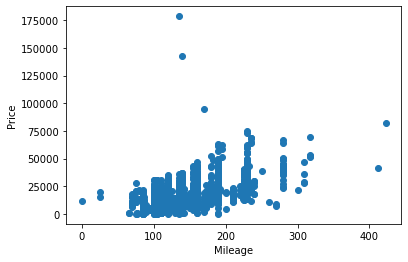

In [18]:
plt.scatter(df.engine_power, df.price)
plt.xlabel('Mileage')
plt.ylabel('Price')
# note: as mileage increasing price range is also increasing

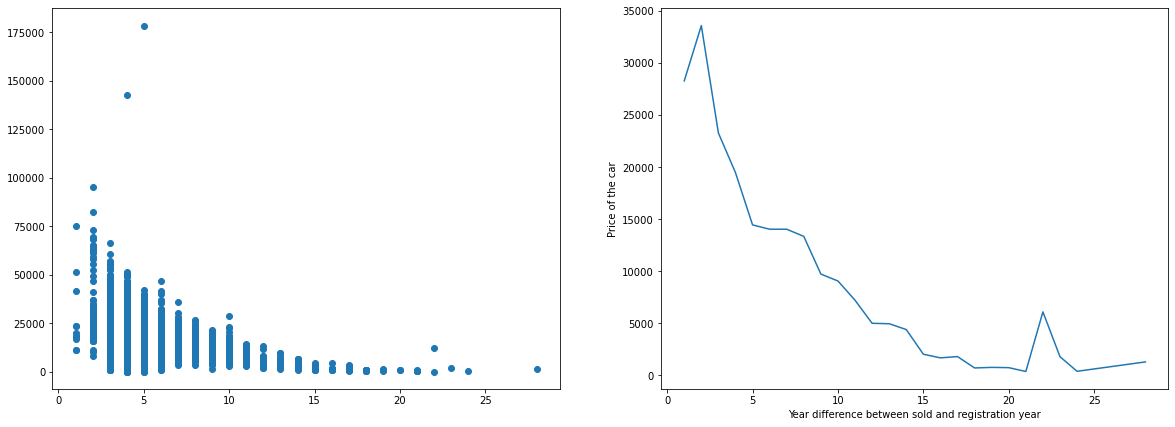

In [19]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
ax[0].scatter(df['year_diff'] .astype('object'), df.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Year difference between sold and registration year')
plt.ylabel('Price of the car')

x = df.groupby('year_diff')['price'].mean().reset_index()
ax[1].plot(x['year_diff'], x.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Year difference between sold and registration year')
plt.ylabel('Price of the car')
plt.show()
# validate the hypothesis

Text(0, 0.5, 'Price of the car')

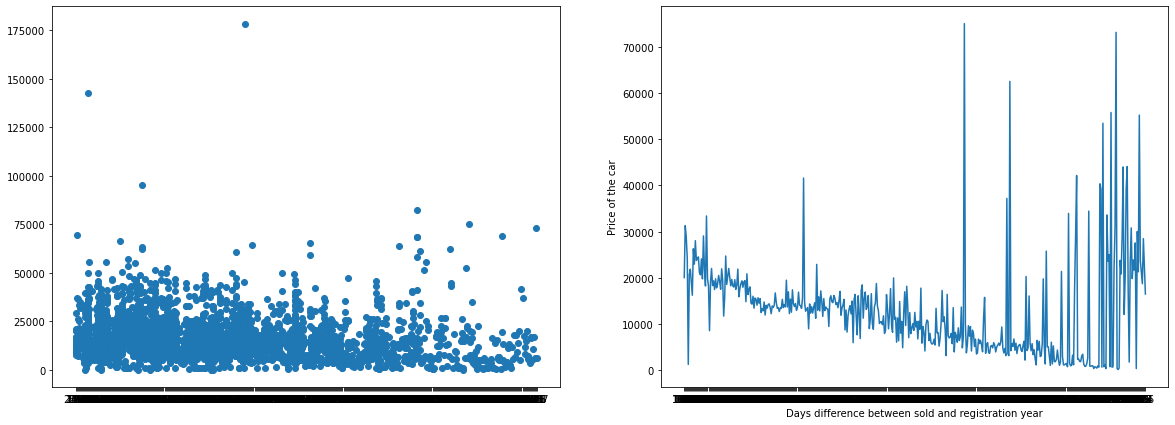

In [20]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
ax[0].scatter(df['diff_reg_sold'] .astype('object'), df.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Days difference between sold and registration year')
plt.ylabel('Price of the car')

x = df.groupby('diff_reg_sold')['price'].mean().reset_index()
ax[1].plot(x['diff_reg_sold'], x.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Days difference between sold and registration year')
plt.ylabel('Price of the car')
# validate the hypothesis

Text(0, 0.5, 'Price of the car')

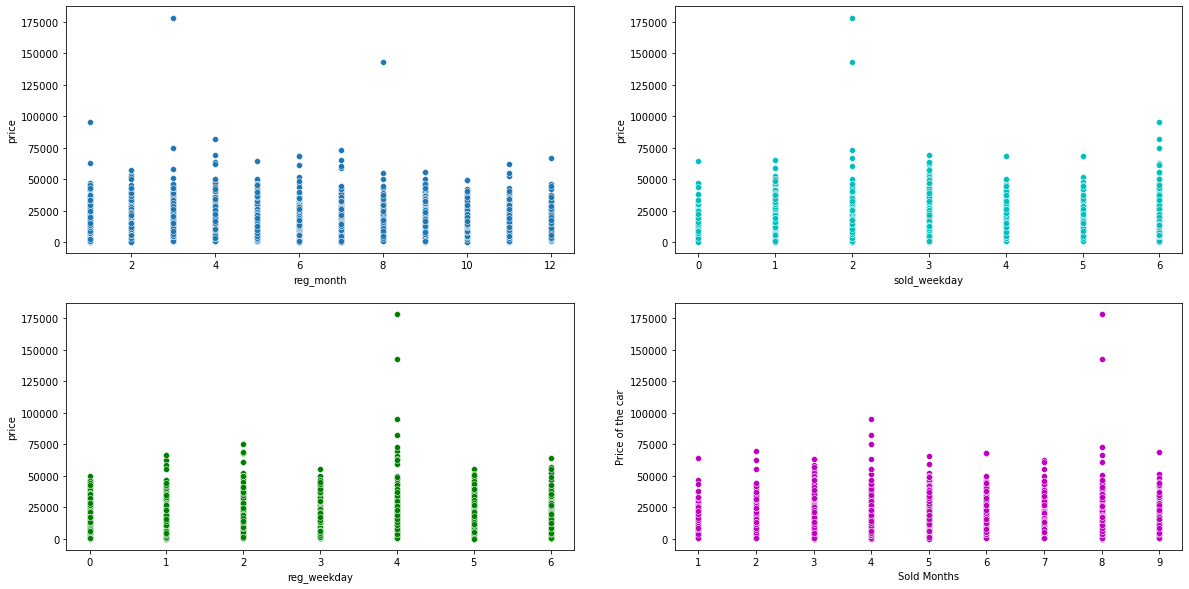

In [21]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
sns.scatterplot(df.reg_month, df.price, ax = ax[0,0])
plt.xlabel('Registration Month')
plt.ylabel('Price of the car')


sns.scatterplot(df.reg_weekday, df.price, ax = ax[1,0], color = 'green')
plt.xlabel('Registration Weekdays')
plt.ylabel('Price of the car')


sns.scatterplot(df.sold_weekday, df.price, ax = ax[0,1], color = 'c')
plt.xlabel('Sold Weekdays')
plt.ylabel('Price of the car')

sns.scatterplot(df.sold_month, df.price, ax = ax[1,1], color = 'm')
plt.xlabel('Sold Months')
plt.ylabel('Price of the car')
# note: looking for seasonality impact on price, however, second hand cars price do not seems to have seasonality impact

Text(0, 0.5, 'Price of the car')

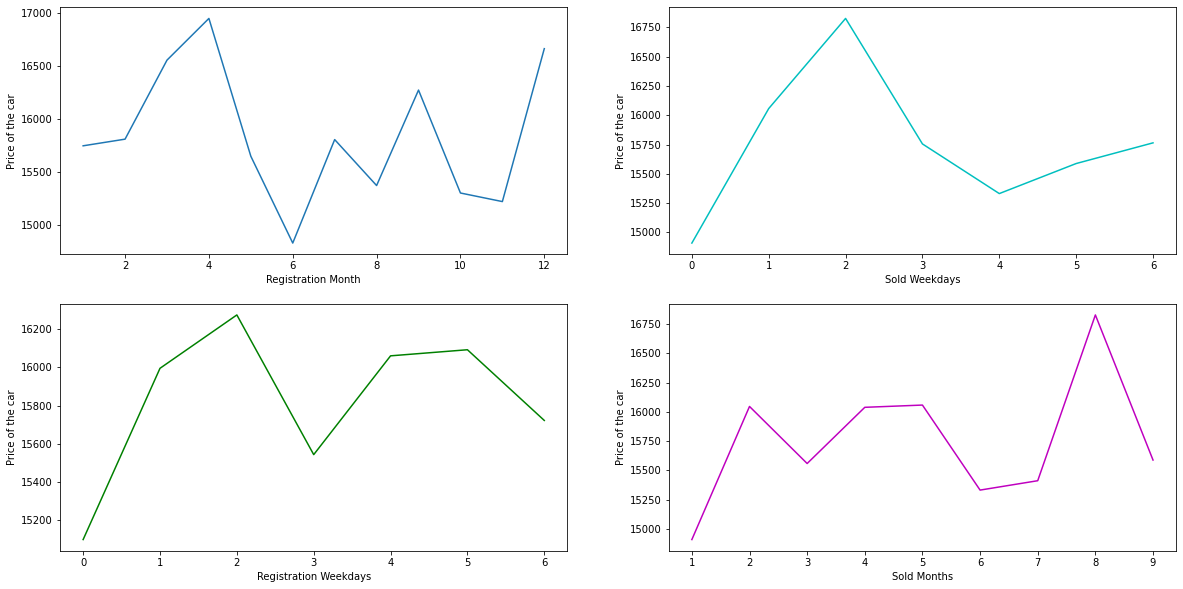

In [22]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
x = df.groupby('reg_month')['price'].mean().reset_index()
ax[0,0].plot(x.reg_month, x.price)
ax[0,0].set_xlabel('Registration Month')
ax[0,0].set_ylabel('Price of the car')

x = df.groupby('reg_weekday')['price'].mean().reset_index()
ax[1,0].plot(x.reg_weekday, x.price, color = 'green')
ax[1,0].set_xlabel('Registration Weekdays')
ax[1,0].set_ylabel('Price of the car')

x = df.groupby('sold_weekday')['price'].mean().reset_index()
ax[0,1].plot(x.sold_weekday, x.price, color = 'c')
ax[0,1].set_xlabel('Sold Weekdays')
ax[0,1].set_ylabel('Price of the car')

x = df.groupby('sold_month')['price'].mean().reset_index()
ax[1,1].plot(x.sold_month, x.price,color = 'm')
ax[1,1].set_xlabel('Sold Months')
ax[1,1].set_ylabel('Price of the car')
# note: looking for seasonality impact on price, however, second hand cars price do not seems to have seasonality impact

In [23]:
#droping columns reg_month reg_weekday sold_weekday sold_month as it is not adding any value:


df = df.drop(columns = ['reg_month','reg_weekday','sold_weekday','sold_month'], axis = 1)

In [24]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,reg_year,reg_weekday_yr,sold_year,sold_weekday_yr,diff_reg_sold,year_diff
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2018-01-01,2012,5,2018,1,2161,6
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2018-02-01,2016,13,2018,5,671,2
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2018-02-01,2012,13,2018,5,2132,6
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2018-02-01,2014,27,2018,5,1311,4
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2018-04-01,2014,49,2018,13,1217,4


In [25]:
# Working with fuel 
df1 = df.groupby('fuel')['price'].mean().reset_index().sort_values(by='price', ascending = False)
df1
# sns.countplot(df.fuel)

,fuel,price
2,hybrid_petrol,37575.000000
1,electro,20966.666667
0,diesel,15846.110752
3,petrol,14398.429319


In [26]:
map_fuel = {'hybrid_petrol':1,'electro':2,'diesel':4,'petrol':3}
df['map_fuel'] = df.fuel.map(map_fuel)
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,reg_year,reg_weekday_yr,sold_year,sold_weekday_yr,diff_reg_sold,year_diff,map_fuel
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2018-01-01,2012,5,2018,1,2161,6,4
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2018-02-01,2016,13,2018,5,671,2,3
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2018-02-01,2012,13,2018,5,2132,6,4
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2018-02-01,2014,27,2018,5,1311,4,4
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2018-04-01,2014,49,2018,13,1217,4,4


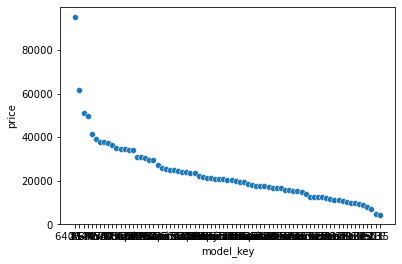

In [27]:
df_modelkey = df.groupby('model_key')['price'].mean().reset_index().sort_values(by='price', ascending = False)
sns.scatterplot(df_modelkey.model_key, df_modelkey.price )

In [28]:
df_modelkey[df_modelkey.price ==27325 ]

,model_key,price
35,430 Gran Coupé,27325.0


In [29]:
df_modelkey.to_csv('df_modelkey.csv')

In [30]:
bin_modelkey ={'116': 'bellow10000','118':'bellow10000','Z4':'bellow10000','123':'bellow10000','650':'bellow10000',
               '523':'bellow10000','216':'bellow10000','735':'bellow10000' ,
               '318 Gran Turismo':'bellow15000','325':'bellow15000','216 Active Tourer':'bellow15000','X1':'bellow15000',
               '125':'bellow15000','120':'bellow15000','320':'bellow15000','220 Active Tourer':'bellow15000',
               '114':'bellow15000','318':'bellow15000','630':'bellow15000','316':'bellow15000',
               '530':'bellow20000','635':'bellow20000','225 Active Tourer': 'bellow20000','225':'bellow20000',
               'X3':'bellow20000','214 Gran Tourer':'bellow20000','320 Gran Turismo':'bellow20000','218':'bellow20000',
               '216 Gran Tourer':'bellow20000','330':'bellow20000','328':'bellow20000','518':'bellow20000',
               '218 Gran Tourer':'bellow20000','520':'bellow20000','218 Active Tourer':'bellow20000','525':'bellow20000',
               '430':'bellow30000','M235':'bellow30000','430 Gran Coupé':'bellow30000','M135':'bellow30000',
               '330 Gran Turismo':'bellow30000','535 Gran Turismo':'bellow30000','335 Gran Turismo':'bellow30000',
               '420 Gran Coupé':'bellow30000','420':'bellow30000','220':'bellow30000','730':'bellow30000','535':'bellow30000',
               '135':'bellow30000','335':'bellow30000','i3':'bellow30000','ActiveHybrid 5':'bellow30000',
               '530 Gran Turismo':'bellow30000','418 Gran Coupé':'bellow30000','325 Gran Turismo':'bellow30000',
               '528':'bellow30000','520 Gran Turismo':'bellow30000',
               '640 Gran Coupé':'bellow40000','X5 M':'bellow40000','740':'bellow40000','750':'bellow40000','M3':'bellow40000',
               'M550':'bellow40000','X6':'bellow40000','640':'bellow40000','435 Gran Coupé':'bellow40000',
               'X4':'bellow40000','435':'bellow40000','425':'bellow40000','X5':'bellow40000',
               'i8':'above40000','M4':'above40000','X6 M':'above40000','X5 M50':'above40000','M5':'above40000'  }

In [31]:
df['bin_model_key']=df.model_key.map(bin_modelkey)

In [32]:
df.groupby('bin_model_key')['model_key'].count()

bin_model_key
above40000       15
bellow10000     517
bellow15000    2008
bellow20000    1633
bellow30000     254
bellow40000     416
Name: model_key, dtype: int64

In [33]:
df['model_key'][df.bin_model_key.isnull()].unique

<bound method Series.unique of Series([], Name: model_key, dtype: object)>

In [34]:
df.groupby('bin_model_key')['price'].mean().reset_index().sort_values(by='price', ascending = False)

,bin_model_key,price
0,above40000,54473.333333
5,bellow40000,32731.490385
4,bellow30000,23190.944882
3,bellow20000,16897.428047
2,bellow15000,11840.089641
1,bellow10000,9599.806576


In [35]:
map_model_key = {'above40000':6,'bellow40000':5,'bellow30000':4,'bellow20000':3,'bellow15000':2,'bellow10000':1}

df['bin_model_key'] = df.bin_model_key.map(map_model_key)

In [36]:
df.groupby('bin_model_key')['price'].mean().reset_index().sort_values(by='price', ascending = False)

,bin_model_key,price
5,6,54473.333333
4,5,32731.490385
3,4,23190.944882
2,3,16897.428047
1,2,11840.089641
0,1,9599.806576


In [37]:
df.groupby('paint_color')['price'].mean().reset_index().sort_values(by='price', ascending =False)

,paint_color,price
6,orange,18866.666667
9,white,17328.438662
7,red,16500.000000
1,black,16173.851806
0,beige,15817.073171
5,grey,15595.744681
3,brown,15367.741935
2,blue,15114.929577
8,silver,14816.109422
4,green,7200.000000


In [38]:
map_colour ={'orange':10,'white':9,'red':8,'black':7,'beige':6,'grey':5,'brown':4,'blue':3,'silver':2,'green':1}

df['paint_color'] = df.paint_color.map(map_colour)

In [39]:
df.groupby('car_type')['price'].mean().reset_index().sort_values(by='price', ascending =False)

,car_type,price
1,coupe,22172.115385
6,suv,21496.124764
0,convertible,17136.170213
4,sedan,16017.465753
7,van,14350.000000
3,hatchback,13289.413448
2,estate,13112.141968
5,subcompact,9521.367521


In [40]:
map_car_type ={'coupe':8,'suv':7,'convertible':6,'sedan':5,'van':4,'hatchback':3,'estate':2,'subcompact':1}

df['car_type'] = df.car_type.map(map_car_type)

In [41]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,reg_year,reg_weekday_yr,sold_year,sold_weekday_yr,diff_reg_sold,year_diff,map_fuel,bin_model_key
0,BMW,118,140411,100,2012-02-01,diesel,7,6,1,1,0,0,1,1,1,0,11300,2018-01-01,2012,5,2018,1,2161,6,4,1
1,BMW,M4,13929,317,2016-04-01,petrol,5,6,1,1,0,0,0,1,1,1,69700,2018-02-01,2016,13,2018,5,671,2,3,6
2,BMW,320,183297,120,2012-04-01,diesel,9,6,0,0,0,0,1,0,1,0,10200,2018-02-01,2012,13,2018,5,2132,6,4,2
3,BMW,420,128035,135,2014-07-01,diesel,8,6,1,1,0,0,1,1,1,1,25100,2018-02-01,2014,27,2018,5,1311,4,4,4
4,BMW,425,97097,160,2014-12-01,diesel,2,6,1,1,0,0,0,1,1,1,33400,2018-04-01,2014,49,2018,13,1217,4,4,5


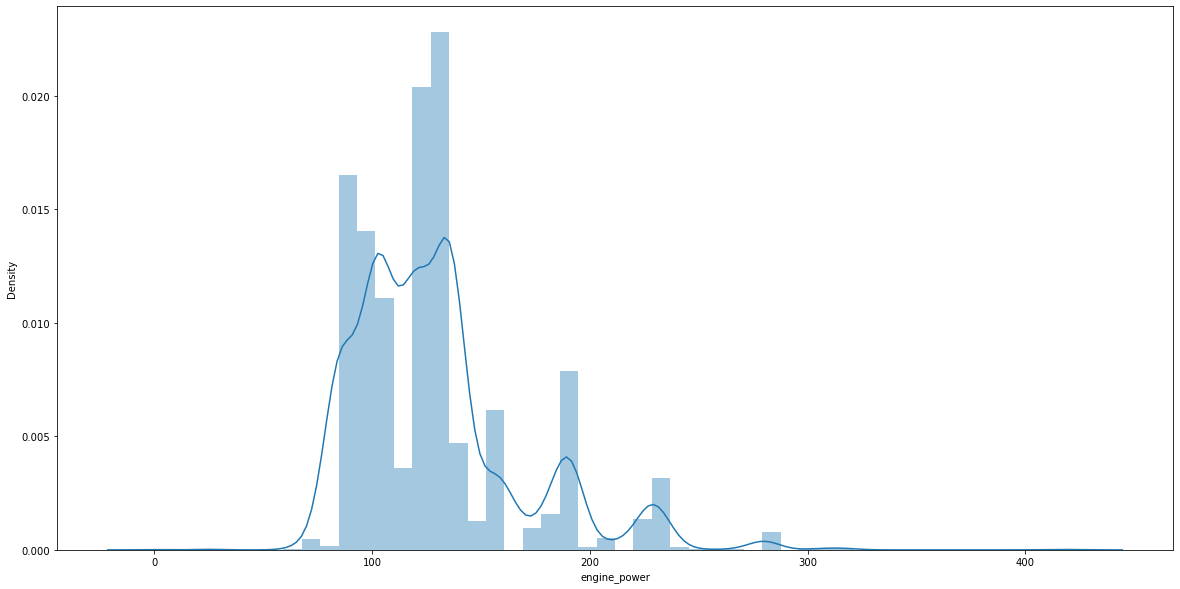

In [42]:
figure = plt.subplots(figsize = (20,10))
sns.distplot(df.engine_power)

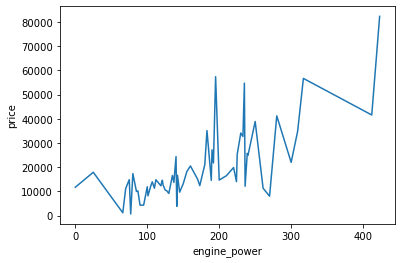

In [43]:
df_eng=df.groupby('engine_power')['price'].mean().reset_index()
sns.lineplot(df_eng.engine_power,df_eng.price)

In [44]:
df.engine_power.sort_values().unique()

array([  0,  25,  66,  70,  75,  77,  80,  85,  87,  90,  95, 100, 101,
       105, 107, 110, 112, 119, 120, 121, 122, 125, 127, 130, 135, 137,
       140, 141, 142, 145, 150, 155, 160, 170, 173, 180, 183, 189, 190,
       192, 195, 200, 210, 220, 224, 225, 230, 233, 235, 236, 239, 240,
       250, 261, 270, 280, 300, 309, 317, 412, 423], dtype=int64)

In [45]:
Engine_bin = {0:'bellow100',25:'bellow100',66:'bellow100',70:'bellow100',75:'bellow100',77:'bellow100',80:'bellow100',
              85:'bellow100',87:'bellow100',90:'bellow100',95:'bellow100',100:'bellow150',101:'bellow150',105:'bellow150',
              107:'bellow150',110:'bellow150',112:'bellow150',119:'bellow150',120:'bellow150',121:'bellow150',122:'bellow150',
              125:'bellow150',127:'bellow150',130:'bellow150',135:'bellow150',137:'bellow150',140:'bellow150',141:'bellow150',
              142:'bellow150',145:'bellow150',150:'bellow200',155:'bellow200',160:'bellow200',170:'bellow200',173:'bellow200',
              180:'bellow200',183:'bellow200',189:'bellow200',190:'bellow200',192:'bellow200',195:'bellow200',200:'bellow300',
              210:'bellow300',220:'bellow300',224:'bellow300',225:'bellow300',230:'bellow300',233:'bellow300',235:'bellow300',
              236:'bellow300',239:'bellow300',240:'bellow300',250:'bellow300',261:'bellow300',270:'bellow300',280:'bellow300',
              300:'bellow400',309:'bellow400',317:'bellow300',412:'bellow300',423:'bellow300'
             }

In [46]:
df['engine_power_bin'] = df.engine_power.map(Engine_bin)

In [47]:
df.groupby('engine_power_bin')['price'].mean().reset_index().sort_values(by='price',ascending=False)

,engine_power_bin,price
4,bellow400,32260.000000
3,bellow300,31851.361868
2,bellow200,22533.977901
1,bellow150,14336.883943
0,bellow100,9696.910112


In [48]:
df.engine_power_bin.unique()

array(['bellow150', 'bellow300', 'bellow200', 'bellow100', 'bellow400'],
      dtype=object)

In [49]:
engine_map={'bellow400':5,'bellow300':4,'bellow200':3,'bellow150':2,'bellow100':1}

In [50]:
df['engine_power_bin'] = df.engine_power_bin.map(engine_map)

In [51]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,reg_year,reg_weekday_yr,sold_year,sold_weekday_yr,diff_reg_sold,year_diff,map_fuel,bin_model_key,engine_power_bin
0,BMW,118,140411,100,2012-02-01,diesel,7,6,1,1,0,0,1,1,1,0,11300,2018-01-01,2012,5,2018,1,2161,6,4,1,2
1,BMW,M4,13929,317,2016-04-01,petrol,5,6,1,1,0,0,0,1,1,1,69700,2018-02-01,2016,13,2018,5,671,2,3,6,4
2,BMW,320,183297,120,2012-04-01,diesel,9,6,0,0,0,0,1,0,1,0,10200,2018-02-01,2012,13,2018,5,2132,6,4,2,2
3,BMW,420,128035,135,2014-07-01,diesel,8,6,1,1,0,0,1,1,1,1,25100,2018-02-01,2014,27,2018,5,1311,4,4,4,2
4,BMW,425,97097,160,2014-12-01,diesel,2,6,1,1,0,0,0,1,1,1,33400,2018-04-01,2014,49,2018,13,1217,4,4,5,3


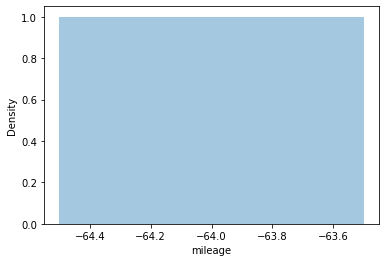

In [52]:
sns.distplot(df.mileage[df.mileage<0])

# as mileage can't be negetive, replacing negetive values to zero

In [53]:
df.mileage = df.mileage.apply(lambda x : 0 if x <0 else x)

In [54]:
df.mileage[df.mileage<0]

Series([], Name: mileage, dtype: int64)

In [55]:
df.engine_power[df.engine_power <75].count()

16

In [56]:
# it seems less than 75 HP engine power is not sufficient to move a car. since there are 16 rowa,removing them.

df = df[df.engine_power>75]

In [57]:
df[df.price <200].count()

maker_key            7
model_key            7
mileage              7
engine_power         7
registration_date    7
fuel                 7
paint_color          7
car_type             7
feature_1            7
feature_2            7
feature_3            7
feature_4            7
feature_5            7
feature_6            7
feature_7            7
feature_8            7
price                7
sold_at              7
reg_year             7
reg_weekday_yr       7
sold_year            7
sold_weekday_yr      7
diff_reg_sold        7
year_diff            7
map_fuel             7
bin_model_key        7
engine_power_bin     7
dtype: int64

In [58]:
df = df[df.price >200]

In [59]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,reg_year,reg_weekday_yr,sold_year,sold_weekday_yr,diff_reg_sold,year_diff,map_fuel,bin_model_key,engine_power_bin
0,BMW,118,140411,100,2012-02-01,diesel,7,6,1,1,0,0,1,1,1,0,11300,2018-01-01,2012,5,2018,1,2161,6,4,1,2
1,BMW,M4,13929,317,2016-04-01,petrol,5,6,1,1,0,0,0,1,1,1,69700,2018-02-01,2016,13,2018,5,671,2,3,6,4
2,BMW,320,183297,120,2012-04-01,diesel,9,6,0,0,0,0,1,0,1,0,10200,2018-02-01,2012,13,2018,5,2132,6,4,2,2
3,BMW,420,128035,135,2014-07-01,diesel,8,6,1,1,0,0,1,1,1,1,25100,2018-02-01,2014,27,2018,5,1311,4,4,4,2
4,BMW,425,97097,160,2014-12-01,diesel,2,6,1,1,0,0,0,1,1,1,33400,2018-04-01,2014,49,2018,13,1217,4,4,5,3


In [60]:
df_clean = df.drop(['maker_key','fuel','model_key','sold_at','registration_date','reg_year',
                    'reg_weekday_yr','sold_year','sold_weekday_yr','engine_power_bin','year_diff'], axis =1)

In [61]:
df_clean.count()

mileage          4808
engine_power     4808
paint_color      4808
car_type         4808
feature_1        4808
feature_2        4808
feature_3        4808
feature_4        4808
feature_5        4808
feature_6        4808
feature_7        4808
feature_8        4808
price            4808
diff_reg_sold    4808
map_fuel         4808
bin_model_key    4808
dtype: int64

In [62]:
df_clean.head()

,mileage,engine_power,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,diff_reg_sold,map_fuel,bin_model_key
0,140411,100,7,6,1,1,0,0,1,1,1,0,11300,2161,4,1
1,13929,317,5,6,1,1,0,0,0,1,1,1,69700,671,3,6
2,183297,120,9,6,0,0,0,0,1,0,1,0,10200,2132,4,2
3,128035,135,8,6,1,1,0,0,1,1,1,1,25100,1311,4,4
4,97097,160,2,6,1,1,0,0,0,1,1,1,33400,1217,4,5


In [63]:
#Target and Feature Split

x = df_clean.drop(['price'],axis =1)
y = df_clean['price']

In [64]:
x.select_dtypes('object').columns

Index(['diff_reg_sold'], dtype='object')

In [65]:
x['diff_reg_sold'] = pd.to_numeric(x['diff_reg_sold'])

In [66]:
x.shape[0]

4808

In [67]:
y.count()

4808

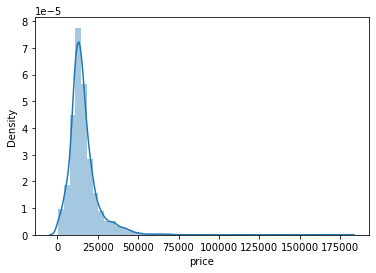

In [68]:
sns.distplot(df_clean.price)

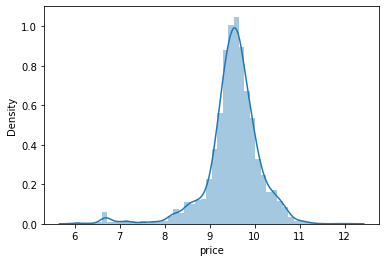

In [69]:
sns.distplot(np.log(df_clean.price))

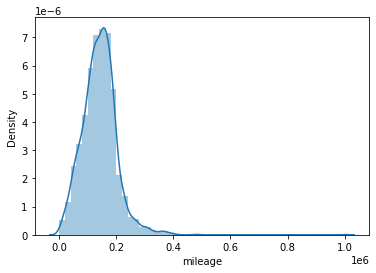

In [70]:
sns.distplot(x.mileage)



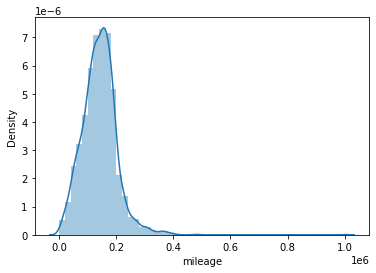

In [71]:
# x['mileage']=np.log(x.mileage)
sns.distplot(x.mileage)

In [72]:
x.head()

,mileage,engine_power,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,diff_reg_sold,map_fuel,bin_model_key
0,140411,100,7,6,1,1,0,0,1,1,1,0,2161,4,1
1,13929,317,5,6,1,1,0,0,0,1,1,1,671,3,6
2,183297,120,9,6,0,0,0,0,1,0,1,0,2132,4,2
3,128035,135,8,6,1,1,0,0,1,1,1,1,1311,4,4
4,97097,160,2,6,1,1,0,0,0,1,1,1,1217,4,5


In [73]:
# x.count() --4843
y.count() #--4843

4808

In [74]:
# standardize the variable 

from sklearn.preprocessing import StandardScaler
# x_scaled =StandardScaler().fit_transform(x) #read



In [75]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=0)

In [76]:
scaler1 = StandardScaler().fit(train_x)

In [77]:
train_x = scaler1.transform(train_x)
test_x = scaler1.transform(test_x)

In [78]:
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor()

In [79]:
param = {'n_estimators':range(70,80,1),
        'max_depth': (10,15,1),
       'min_samples_split':(6,10,1),
        'min_samples_leaf':(8,12,1)}

grid = GridSearchCV(estimator = RFModel, param_grid=param, cv=3, scoring = 'r2', n_jobs = -1)
grid = grid.fit(train_x,train_y)

In [80]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (10, 15, 1),
                         'min_samples_leaf': (8, 12, 1),
                         'min_samples_split': (6, 10, 1),
                         'n_estimators': range(70, 80)},
             scoring='r2')>

In [81]:
grid.best_estimator_

# RandomForestRegressor(max_depth=7, min_samples_leaf=6, n_estimators=50)  --first estimation
# RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=6,n_estimators=70)  --2nd estimation            


RandomForestRegressor(max_depth=15, min_samples_leaf=8, min_samples_split=10,
                      n_estimators=71)

In [82]:
grid.best_score_

0.7497158334168704

In [83]:
# RFModel=grid.best_estimator_
RFModel=RandomForestRegressor(max_depth=15, n_estimators=150)

In [84]:
RFModel.fit(train_x, train_y)

RandomForestRegressor(max_depth=15, n_estimators=150)

In [85]:
train_pred = RFModel.predict(train_x)
test_pred = RFModel.predict(test_x)

In [86]:
print(metrics.r2_score(train_y,train_pred))
print(metrics.r2_score(test_y,test_pred))

#No tuning

# 0.9612895297508015
# 0.832568211303768

#2nd tuning

# 0.8087202100445796
# 0.8651879867839978

0.9635382614732566
0.8499007812822925


In [87]:

print(metrics.mean_squared_error(test_y,test_pred))
print(np.sqrt(metrics.mean_squared_error(test_y,test_pred)))
print(np.sqrt(metrics.mean_squared_log_error( test_y,test_pred)))

#No Tuning
# 12551196.151767151
# 3542.7667368551306
# 0.2799859380553033

#2nd Tuning
# 10105918.563400906
# 3178.9807428483905
# 0.29421851450734043



11251893.986337991
3354.3842931807903
0.274974420659094


In [88]:
for each in test_pred:
    if each<0:
        print(each)

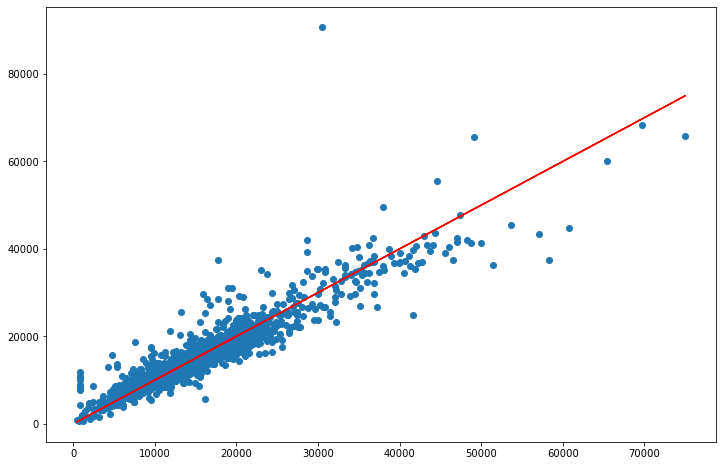

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(test_y,test_pred)
plt.plot(test_y,test_y,'r')

In [90]:
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
l=[]
setused=x
target=y

kfold, scores = KFold(n_splits=15,random_state=True), list()
for train, test in kfold.split(setused,target):
    x_train, x_test = setused.values[train], setused.values[test]
    y_train, y_test = target.values[train], target.values[test] 
    scaler2 = StandardScaler().fit(x_train)
    x_train = scaler2.transform(x_train)
    x_test = scaler2.transform(x_test)
    
    model = RFModel
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = setused.columns,
                                        columns=['importance'])
    sum=feature_importances.values
    l.append(sum)
    score = metrics.r2_score(y_test, preds)
#     score = np.sqrt(metrics.mean_squared_log_error(y_test, preds))
    scores.append(score)
    print(score)
print("Average scores are: ", np.sum(scores)/len(scores))

# 0.7919718652925798
# 0.796680218174041
# 0.7936670153201992

0.7991436075840502
0.7418279937908627
0.7770502905173283
0.7746641744977439
0.8073451248487267
0.758019869319362
0.7428414813741981
0.890386388329043
0.8503603285367335
0.8946120889836242
0.9058892260118978
0.8465997199392846
0.8461821413432215
0.9051740418708148
0.47880348153462227
Average scores are:  0.801259997232101


15

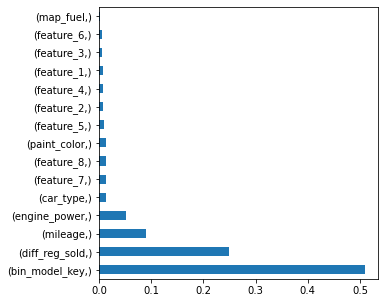

In [91]:
train_set=setused
labels=target
threshold=0.0005
add=0
for item in l:
  add+=item
df_cv=pd.DataFrame(add/len(l),index=train_set.columns,columns=["importance"]).sort_values('importance', ascending=False)
imp_columns=df_cv[df_cv['importance']>threshold].index.tolist()
df_cv=df_cv.reset_index()
feat_imp = pd.Series(df_cv.importance.values, index=df_cv.drop(["importance"], axis=1)).sort_values(axis='index',ascending=False)
X2=setused[imp_columns]
feat_imp.nlargest(25).plot(kind='barh', figsize=(5,5))
len(imp_columns)